In [1]:
import numpy as np
import pandas as pd

In [2]:
experimentB = pd.read_csv("Survey_B.csv")

In [3]:
experimentB.head()

Gender  Age Perfect_Pitch Listen_Music Played_Instruement  Years Control  \
0    Male   20            No          Yes                Yes      5  Higher   
1  Female   20            No          Yes                 No      0  Higher   
2    Male   20            No          Yes                Yes      8  Higher   
3    Male   20            No          Yes                Yes      8   Lower   
4    Male   18            No          Yes                Yes      4  Higher   

  Sequence1 Sequence1_Timing Sequence2 Sequence2_Timing Sequence3  \
0      Same          Earlier     Lower         Expected    Higher   
1    Higher            Later     Lower            Later    Higher   
2    Higher         Expected     Lower          Earlier    Higher   
3    Higher          Earlier      Same          Earlier     Lower   
4    Higher          Earlier    Higher            Later      Same   

  Sequence3_Timing Sequence4 Sequence4_Timing     Easiest  
0            Later     Lower            Later  Question 1  
1         Expected    Higher            Later  Question 1  
2          Earlier    Higher         Expected  Question 4  
3          Earlier    Higher         Expected  Question 1  
4          Earlier    Higher         Expected  Question 1

# Part 1: Exploratory Data Analysis

## Data Cleaning

In this experiment, participants were given a two note sequance and asked to rate whether the second note was a higher or lower pitch than the first note. This sequance was D, D#, with the correct anwser being HIGHER as D# is higher than D. Participants that failed this inital test are excluded from the analysis.

In [4]:
experimentB = experimentB[experimentB['Control'] == "Higher"]
experimentB


Gender  Age Perfect_Pitch Listen_Music Played_Instruement  Years Control  \
0     Male   20            No          Yes                Yes      5  Higher   
1   Female   20            No          Yes                 No      0  Higher   
2     Male   20            No          Yes                Yes      8  Higher   
4     Male   18            No          Yes                Yes      4  Higher   
5   Female   20            No          Yes                Yes      3  Higher   
6     Male   20            No          Yes                Yes     16  Higher   
7     Male   20            No          Yes                Yes     16  Higher   
8   Female   20            No          Yes                 No      0  Higher   
9   Female   20            No          Yes                Yes     10  Higher   
10  Female   20            No          Yes                Yes     10  Higher   
11    Male   18            No          Yes                Yes      5  Higher   
12  Female   21            No          Yes                Yes     14  Higher   
13    Male   20            No          Yes                Yes      1  Higher   
14  Female   21            No          Yes                Yes     10  Higher   
15    Male   21            No          Yes                 No      0  Higher   

   Sequence1 Sequence1_Timing Sequence2 Sequence2_Timing Sequence3  \
0       Same          Earlier     Lower         Expected    Higher   
1     Higher            Later     Lower            Later    Higher   
2     Higher         Expected     Lower          Earlier    Higher   
4     Higher          Earlier    Higher            Later      Same   
5     Higher         Expected     Lower          Earlier    Higher   
6     Higher          Earlier     Lower            Later    Higher   
7     Higher          Earlier     Lower            Later    Higher   
8     Higher            Later     Lower         Expected    Higher   
9       Same            Later      Same          Earlier      Same   
10    Higher          Earlier     Lower          Earlier      Same   
11    Higher            Later     Lower         Expected    Higher   
12      Same            Later     Lower            Later    Higher   
13    Higher          Earlier    Higher            Later      Same   
14    Higher            Later     Lower          Earlier    Higher   
15    Higher         Expected     Lower          Earlier    Higher   

   Sequence3_Timing Sequence4 Sequence4_Timing     Easiest  
0             Later     Lower            Later  Question 1  
1          Expected    Higher            Later  Question 1  
2           Earlier    Higher         Expected  Question 4  
4           Earlier    Higher         Expected  Question 1  
5          Expected    Higher         Expected  Question 1  
6           Earlier    Higher          Earlier  Question 4  
7           Earlier    Higher          Earlier  Question 4  
8          Expected    Higher         Expected  Question 1  
9           Earlier    Higher         Expected  Question 4  
10         Expected    Higher          Earlier  Question 1  
11         Expected    Higher         Expected  Question 4  
12          Earlier    Higher         Expected  Question 3  
13          Earlier     Lower         Expected  Question 1  
14         Expected    Higher         Expected  Question 1  
15          Earlier    Higher            Later  Question 1

In [5]:
experimentB.loc[(experimentB.Sequence1 != 'Higher'),'Sequence1']='Incorrect'
experimentB.loc[(experimentB.Sequence1 == 'Higher'),'Sequence1']='Correct'

experimentB.loc[(experimentB.Sequence2 != 'Lower'),'Sequence2']='Incorrect'
experimentB.loc[(experimentB.Sequence2 == 'Lower'),'Sequence2']='Correct'

experimentB.loc[(experimentB.Sequence3 != 'Higher'),'Sequence3']='Incorrect'
experimentB.loc[(experimentB.Sequence3 == 'Higher'),'Sequence3']='Correct'

experimentB.loc[(experimentB.Sequence4 != 'Higher'),'Sequence4']='Incorrect'
experimentB.loc[(experimentB.Sequence4 == 'Higher'),'Sequence4']='Correct'


experimentB

Gender  Age Perfect_Pitch Listen_Music Played_Instruement  Years Control  \
0     Male   20            No          Yes                Yes      5  Higher   
1   Female   20            No          Yes                 No      0  Higher   
2     Male   20            No          Yes                Yes      8  Higher   
4     Male   18            No          Yes                Yes      4  Higher   
5   Female   20            No          Yes                Yes      3  Higher   
6     Male   20            No          Yes                Yes     16  Higher   
7     Male   20            No          Yes                Yes     16  Higher   
8   Female   20            No          Yes                 No      0  Higher   
9   Female   20            No          Yes                Yes     10  Higher   
10  Female   20            No          Yes                Yes     10  Higher   
11    Male   18            No          Yes                Yes      5  Higher   
12  Female   21            No          Yes                Yes     14  Higher   
13    Male   20            No          Yes                Yes      1  Higher   
14  Female   21            No          Yes                Yes     10  Higher   
15    Male   21            No          Yes                 No      0  Higher   

    Sequence1 Sequence1_Timing  Sequence2 Sequence2_Timing  Sequence3  \
0   Incorrect          Earlier    Correct         Expected    Correct   
1     Correct            Later    Correct            Later    Correct   
2     Correct         Expected    Correct          Earlier    Correct   
4     Correct          Earlier  Incorrect            Later  Incorrect   
5     Correct         Expected    Correct          Earlier    Correct   
6     Correct          Earlier    Correct            Later    Correct   
7     Correct          Earlier    Correct            Later    Correct   
8     Correct            Later    Correct         Expected    Correct   
9   Incorrect            Later  Incorrect          Earlier  Incorrect   
10    Correct          Earlier    Correct          Earlier  Incorrect   
11    Correct            Later    Correct         Expected    Correct   
12  Incorrect            Later    Correct            Later    Correct   
13    Correct          Earlier  Incorrect            Later  Incorrect   
14    Correct            Later    Correct          Earlier    Correct   
15    Correct         Expected    Correct          Earlier    Correct   

   Sequence3_Timing  Sequence4 Sequence4_Timing     Easiest  
0             Later  Incorrect            Later  Question 1  
1          Expected    Correct            Later  Question 1  
2           Earlier    Correct         Expected  Question 4  
4           Earlier    Correct         Expected  Question 1  
5          Expected    Correct         Expected  Question 1  
6           Earlier    Correct          Earlier  Question 4  
7           Earlier    Correct          Earlier  Question 4  
8          Expected    Correct         Expected  Question 1  
9           Earlier    Correct         Expected  Question 4  
10         Expected    Correct          Earlier  Question 1  
11         Expected    Correct         Expected  Question 4  
12          Earlier    Correct         Expected  Question 3  
13          Earlier  Incorrect         Expected  Question 1  
14         Expected    Correct         Expected  Question 1  
15          Earlier    Correct            Later  Question 1

## Looking at the Big Picture

### Demographical Snapshot

Participants are first split up based on demographical data in order to surface up any abnormalities that would warrant future individual investigation. This also gives us a good picture/snapshot of the underlying distribution we are looking at. 

Note: Of all participants'response collected, gender data that were entered were either male or female. A non-binary option was avalible for participant to select, albeit no participants in our sample selected that option.

### Male

In [6]:
experimentB_Male = experimentB[experimentB['Gender'] == "Male"]


In [7]:
#Number of Particpants
experimentB_Male.shape[0]

8

In [8]:
#Average Age
experimentB_Male[['Age']].mean()

Age    19.625
dtype: float64

In [9]:
#Average Years of Musical Training
experimentB_Male[['Years']].mean()

Years    6.875
dtype: float64

#### Female

In [10]:
experimentB_Female = experimentB[experimentB['Gender'] == "Female"]

In [11]:
#Number of Particpants
experimentB_Female.shape[0]

7

In [12]:
#Average Age
experimentB_Female[['Age']].mean()

Age    20.285714
dtype: float64

In [13]:
#Average Years of Musical Training
experimentB_Female[['Years']].mean()

Years    6.714286
dtype: float64

### Music Background Snapshot

#### Listened to Music?

In [14]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentB[experimentB['Listen_Music'] == "Yes"].shape[0]/experimentB.shape[0]

1.0

#### Played an instrument?

In [15]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentB[experimentB['Played_Instruement'] == "Yes"].shape[0]/experimentB.shape[0]

0.8

#### Average Years of Musical training (all samples)

In [16]:
experimentB[["Years"]].mean()

Years    6.8
dtype: float64

### Correctness Snapshot

The proportion of correct versus incorrect responses are now looked at for each musical sequance that was played. A graph depicting these results are displayed.

Participants were also asked if they felt if the comparison tone (last note) arrived earlier, later, or as expected when compared to the rest of the sequance. Here, we also look at how participants responded.

#### Sequence 1 (Normal Metric Position): 80% Correct
F# F D E# G F# D# E F# G (G HIGHER than F#)

In [17]:
sequence1_all = experimentB[experimentB['Sequence1'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence1_all

80.0

In [18]:
# Timing: Correct Response
sequence1_all_timing_expected = experimentB[experimentB['Sequence1_Timing'] == "Expected"].shape[0]/experimentB.shape[0] * 100
sequence1_all_timing_expected

20.0

In [19]:
sequence1_all_timing_earlier = experimentB[experimentB['Sequence1_Timing'] == "Earlier"].shape[0]/experimentB.shape[0] * 100
sequence1_all_timing_earlier

40.0

In [20]:
sequence1_all_timing_later = experimentB[experimentB['Sequence1_Timing'] == "Later"].shape[0]/experimentB.shape[0] * 100
sequence1_all_timing_later

40.0

#### Sequence 2 (Very Early):
G F D E# G F# D# E G F# (F# is LOWER than G)

In [21]:
sequence2_all = experimentB[experimentB['Sequence2'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence2_all

80.0

In [22]:
sequence2_all_timing_expected = experimentB[experimentB['Sequence2_Timing'] == "Expected"].shape[0]/experimentB.shape[0] * 100
sequence2_all_timing_expected

20.0

In [23]:
# Timing: Correct Response
sequence2_all_timing_earlier = experimentB[experimentB['Sequence2_Timing'] == "Earlier"].shape[0]/experimentB.shape[0] * 100
sequence2_all_timing_earlier

40.0

In [24]:
sequence2_all_timing_later = experimentB[experimentB['Sequence2_Timing'] == "Later"].shape[0]/experimentB.shape[0] * 100
sequence2_all_timing_later

40.0

#### Sequence 3 (Irregular): 
E F D E# G F# D# E F (F HIGHER than E)

In [25]:
sequence3_all = experimentB[experimentB['Sequence3'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence3_all

73.33333333333333

#### Sequence 4 (Very Late):
F# E D E# G F D# E F# G (G HIGHER than F#)

In [26]:
sequence4_all = experimentB[experimentB['Sequence4'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence4_all

86.66666666666667

In [27]:
sequence4_all_timing_expected = experimentB[experimentB['Sequence4_Timing'] == "Expected"].shape[0]/experimentB.shape[0] * 100
sequence4_all_timing_expected

60.0

In [28]:
sequence4_all_timing_earlier = experimentB[experimentB['Sequence4_Timing'] == "Earlier"].shape[0]/experimentB.shape[0] * 100
sequence4_all_timing_earlier

20.0

In [29]:
# Timing: Correct Response
sequence4_all_timing_later = experimentB[experimentB['Sequence4_Timing'] == "Later"].shape[0]/experimentB.shape[0] * 100
sequence4_all_timing_later

20.0

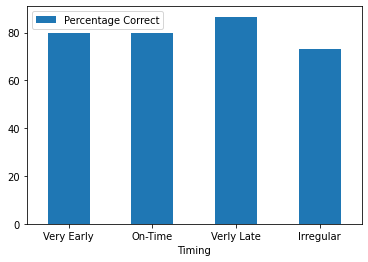

In [30]:
experimentB_all_bar = pd.DataFrame({'Timing':['Very Early','On-Time','Verly Late','Irregular'], 'Percentage Correct':[sequence2_all,sequence1_all,sequence4_all,sequence3_all]})
ax = experimentB_all_bar.plot.bar(x='Timing', y='Percentage Correct', rot=0)



# Part 2 Data Analysis:

## Hypothesis (A/B) Testing:
Null: The timing of the comparison tone (the last note) relatively to the distracting tones (notes in the middle)
does not affect a participants performance in determining if the comparison tone is higher/lower/same in pitch
than than the standard tone.

In [31]:
test_statistics = []
sampling_array = np.append(experimentB["Sequence1"].array,experimentB["Sequence2"].array)
sampling_array = np.append(sampling_array,experimentB["Sequence3"].array)
sampling_array = np.append(sampling_array,experimentB["Sequence4"].array)





In [32]:
def observerd_statistic_cacl(seq1,seq2=None,general=True):
    if general == True:
        sequance_test = experimentB[seq1].values
        a = np.count_nonzero(sampling_array == "Correct")/len(sampling_array)
        b = np.count_nonzero(sequance_test == "Correct")/len(sequance_test)
        return b - a
    else:
        sequance_test_1 = experimentB[seq1].values
        sequance_test_2 = experimentB[seq2].values
        a = np.count_nonzero(sequance_test_1 =="Correct")/len(sequance_test_1)
        b = np.count_nonzero(sequance_test_2=="Correct")/len(sequance_test_2)
        return b-a
    

In [33]:
def a_b_test(seq):
    ##Calculates the test statistic between a sequance and general distribution.
    sequance_test = experimentB[seq].sample(n=experimentB.shape[0],replace=True).values
    general_test = np.random.choice(sampling_array,size=experimentB.shape[0],replace=True)

    #Pecent correct in specific sequanfe distribution
    unique, counts = np.unique(sequance_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance = result['Correct']/len(sequance_test)
    except:
        percent_correct_sequance = 0

    #Percent correct in overall distribution    
    unique1, counts1 = np.unique(general_test, return_counts=True)
    result1 = dict(zip(unique1, counts1))
    try:
        percent_correct_general = result1['Correct']/len(general_test)
    except:
        percent_correct_general = 0

    
    #Calculate test statistic (percent correct sequance - percent correct general distribution)
    test_statistic = percent_correct_sequance-percent_correct_general
   
    return np.array([test_statistic])
    


In [34]:
def a_b_test_special(seq1,seq2):
    ##Calculates the test statistic between two sequances.
    ##Statistic is seq2_correct - seq1_correct
    sequance1_test = experimentB[seq1].sample(n=experimentB.shape[0],replace=True).values
    sequance2_test = experimentB[seq2].sample(n=experimentB.shape[0],replace=True).values

    #Pecent correct in sequance1 distribution
    unique, counts = np.unique(sequance1_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance1 = result['Correct']/len(sequance1_test)
    except:
        percent_correct_sequance1 = 0
        
    
    #Pecent correct in sequance2 distribution
    unique, counts = np.unique(sequance2_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance2 = result['Correct']/len(sequance2_test)
    except:
        percent_correct_sequance2 = 0
        

    #Calculate test statistic (percent correct sequance1 - percent correct sequance2)
    test_statistic = percent_correct_sequance2-percent_correct_sequance1
   
    return np.array([test_statistic])

#### Sequence 1 (Normal Metric Position): 80% Correct
F# F D E# G F# D# E F# G (G HIGHER than F#)

In [35]:
observed_statistic = observerd_statistic_cacl("Sequence1")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequence1")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.0


0.593

#### Sequence 2 (Very Early):
G F D E# G F# D# E G F# (F# is LOWER than G)

In [36]:
observed_statistic = observerd_statistic_cacl("Sequence2")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequence2")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.0


0.586

#### Sequence 3 (Irregular): 
E F D E# G F# D# E F (F HIGHER than E)

In [37]:
observed_statistic = observerd_statistic_cacl("Sequence3")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequence3")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

-0.06666666666666676


0.485

#### Sequence 4 (Very Late):
F# E D E# G F D# E F# G (G HIGHER than F#)

In [38]:
observed_statistic = observerd_statistic_cacl("Sequence4")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequence4")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.06666666666666665


0.574

## Further Analysis:
Here we look further at more closely if whether there is correlation between whether a participant correctly determined the arrival sequance of the note (earlier, later, or expected) and if they anwsered correctly. That is, I look at the number of people who anwser both the timing and pitch question correctly and compare it with the number of people who only anwsered the pitch question correctly.

In [39]:
correct_timing = experimentB[experimentB['Sequence1_Timing'] == "Expected"]
seq = "Sequence1"

In [40]:
def a_b_test_performance(correct_timing,seq):
    sequance_test = correct_timing[seq].sample(n=correct_timing.shape[0],replace=True).values
    general_test = experimentB[seq].sample(n=experimentB.shape[0],replace=True).values

    #Pecent correct in specific sequanfe distribution
    unique, counts = np.unique(sequance_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance = result['Correct']/len(sequance_test)
    except:
        percent_correct_sequance = 0

    #Percent correct in overall distribution    
    unique1, counts1 = np.unique(general_test, return_counts=True)
    result1 = dict(zip(unique1, counts1))
    try:
        percent_correct_general = result1['Correct']/len(general_test)
    except:
        percent_correct_general = 0


    #Calculate test statistic (percent correct sequance - percent correct general distribution)
    test_statistic = percent_correct_sequance-percent_correct_general

    return np.array([test_statistic])


#### Sequence 1 (Normal Metric Position)


In [41]:
seq1_correct_timing = experimentB[experimentB['Sequence1_Timing'] == "Expected"]
seq1_correct_timing[seq1_correct_timing["Sequence1"] == "Correct"].shape[0]/seq1_correct_timing.shape[0]*100

100.0

In [42]:
a = seq1_correct_timing[seq1_correct_timing["Sequence1"] == "Correct"].shape[0]/seq1_correct_timing.shape[0]
b = experimentB[experimentB['Sequence1'] == "Correct"].shape[0]/experimentB.shape[0]
observed = a - b

test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_performance(seq1_correct_timing,"Sequence1")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value


0.18

#### Sequence 2 (Very Early)


In [43]:
seq2_correct_timing = experimentB[experimentB['Sequence2_Timing'] == "Earlier"]
seq2_correct_timing[seq2_correct_timing["Sequence2"] == "Correct"].shape[0]/seq2_correct_timing.shape[0]*100




83.33333333333334

In [44]:
a = seq2_correct_timing[seq2_correct_timing["Sequence2"] == "Correct"].shape[0]/seq2_correct_timing.shape[0]
b = experimentB[experimentB['Sequence2'] == "Correct"].shape[0]/experimentB.shape[0]
observed = a - b

test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_performance(seq2_correct_timing,"Sequence2")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value


0.567

#### Sequence 4 (Very Late)


In [45]:
seq4_correct_timing = experimentB[experimentB['Sequence4_Timing'] == "Later"]
seq4_correct_timing[seq4_correct_timing["Sequence2"] == "Correct"].shape[0]/seq4_correct_timing.shape[0]*100



100.0

In [46]:
a = seq4_correct_timing[seq4_correct_timing["Sequence4"] == "Correct"].shape[0]/seq4_correct_timing.shape[0]
b = experimentB[experimentB['Sequence4'] == "Correct"].shape[0]/experimentB.shape[0]
observed = a - b

test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_performance(seq4_correct_timing,"Sequence4")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value


0.807

#### Easiest Sequence:
We can also see which sequence participants ranked as easiest. A graph is shown below

In [47]:
s1 = experimentB[experimentB['Easiest'] == "Question 1"].shape[0]/len(experimentB) * 100
s2 = experimentB[experimentB['Easiest'] == "Question 2"].shape[0]/len(experimentB) * 100
s3 = experimentB[experimentB['Easiest'] == "Question 3"].shape[0]/len(experimentB) * 100
s4 = experimentB[experimentB['Easiest'] == "Question 4"].shape[0]/len(experimentB) * 100


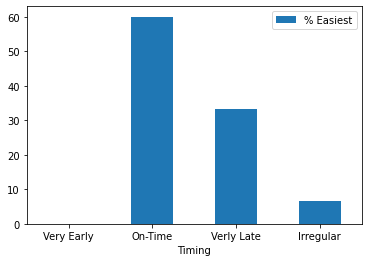

In [48]:
easiest_bar = pd.DataFrame({'Timing':["Very Early",'On-Time','Verly Late','Irregular'], '% Easiest':[s2,s1,s4,s3]})
ax = easiest_bar.plot.bar(x='Timing', y='% Easiest', rot=0)

